In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('dataset.txt', sep = ';', low_memory = False)

In [3]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
'''we came to know it is a time-series data'''
'''check if there are any missing data'''
print(dataset.isnull().sum())

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [5]:
'''check the shape of the dataframe'''
print(dataset.shape)

(2075259, 9)


In [6]:
'''pandas identified some missing values, but there are more missing values that pandas was not able to detect'''
missing_values = ['nan', '?']
#loading the dataset again after handling the missing values and making the time-stamp as one column
df = pd.read_csv('dataset.txt', sep = ';', low_memory = False, 
              parse_dates = {'dt': ['Date', 'Time']}, infer_datetime_format = True,
              na_values = missing_values, index_col = 'dt')

In [7]:
'''now the data is converted into time-series by taking the index as the dt column'''
'''the exploratory analysis can now be started'''
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
'''checking the datatype of each column'''
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [9]:
df.shape

(2075259, 7)

In [10]:
'''the dt column is the index and the start and end time is given by the info method'''
'''we now find the range of values and the quantile range of each column.'''
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [11]:
'''handling the not available data using mean/test statistics'''
'''finding the columns that contain missing values'''
missing_list = []
for i in range(7):
    if not(df.iloc[:, i].notnull().all()):
        missing_list.append(i)


In [12]:
print(missing_list)

[0, 1, 2, 3, 4, 5, 6]


In [13]:
'''since all the columns contain missing values, we run a loop across all the column and fill all the missing values with mean'''
for i in range(7):
    df.iloc[:, i] = df.iloc[:,i].fillna(df.iloc[:,i].mean())

In [14]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [15]:
'''now we check if there is anu major change in the data after handling the missing values'''
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [16]:
import dill 
dill.dump_session('old_env.env')

In [17]:
import dill 
dill.load_session('old_env.env')

In [18]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [19]:
dill.dump_session('old_env.env')

In [20]:
import dill

In [21]:
dill.load_session('old_env.env')

In [22]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [23]:
#finding the sum of the power for every month
df['Global_active_power'].resample('M').sum()

dt
2006-12-31    41817.648460
2007-01-31    69014.045230
2007-02-28    56491.069230
2007-03-31    58863.283615
2007-04-30    39245.548781
2007-05-31    44008.872000
2007-06-30    35729.767447
2007-07-31    29846.831570
2007-08-31    34120.475531
2007-09-30    41874.789230
2007-10-31    49278.553230
2007-11-30    55920.827230
2007-12-31    72605.261615
2008-01-31    65170.473615
2008-02-29    49334.346845
2008-03-31    55591.685615
2008-04-30    48209.992000
2008-05-31    45724.043230
2008-06-30    42945.063615
2008-07-31    35479.601230
2008-08-31    12344.063230
2008-09-30    42667.792000
2008-10-31    50743.399447
2008-11-30    59918.584535
2008-12-31    56911.416668
2009-01-31    62951.099615
2009-02-28    50291.953362
2009-03-31    54761.169230
2009-04-30    49277.707230
2009-05-31    45214.196460
2009-06-30    37149.767696
2009-07-31    27594.810460
2009-08-31    30049.032998
2009-09-30    42631.838845
2009-10-31    51089.811615
2009-11-30    55068.733615
2009-12-31    60907.18923

In [24]:
'''Data Visualization'''
import matplotlib.pyplot as plt
#plotting the total sum of energy cosumped everyday 
df['Global_active_power'].resample('D').sum().plot(title = 'Resampled sum daily', color = 'blue')
plt.show()
#plotting the mean energy consumed everyday
df['Global_active_power'].resample('D').mean().plot(title = 'Resample mean daily', color = 'red')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C00EAE710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000017C00CE5940>], dtype=object)

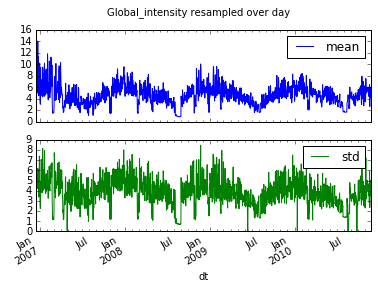

In [25]:
#knowing the magnitude of power consumed
#plotting the graph for mean and standard deviation for daily data
df['Global_intensity'].resample('D').agg(['mean', 'std']).plot(subplots = True, title = 'Global_intensity resampled over day')

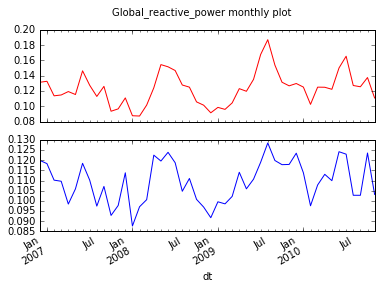

In [26]:
import matplotlib.pyplot as plt
df['Global_reactive_power'].resample('M').agg(['mean', 'std']).plot(subplots = True, title = 'Global_reactive_power monthly plot', color = ['red', 'blue'], legend = False)
plt.show()

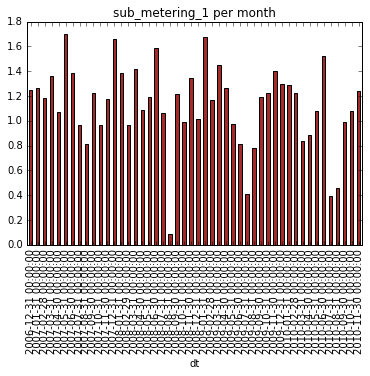

In [27]:
#exploring the submeters
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.title('sub_metering_1 per month')
plt.show()

#### From the above plots, the mean of Voltage over month is pretty much constant compared to other features. This can be used in feature selection. 
Before feature selection, lets compare the mean of different features resampled over day.

In [28]:
'''cols = [0,1,2,3,4,5,6]
i = 1
vals = df.resample('D').mean().values
for group in groups:
    plt.subplot(len(cols),1,i)
    plt.plot(vals[:,group])
    plt.title(df.columns[group], y= 0.75)
    i+=1
plt.show()'''

NameError: name 'groups' is not defined

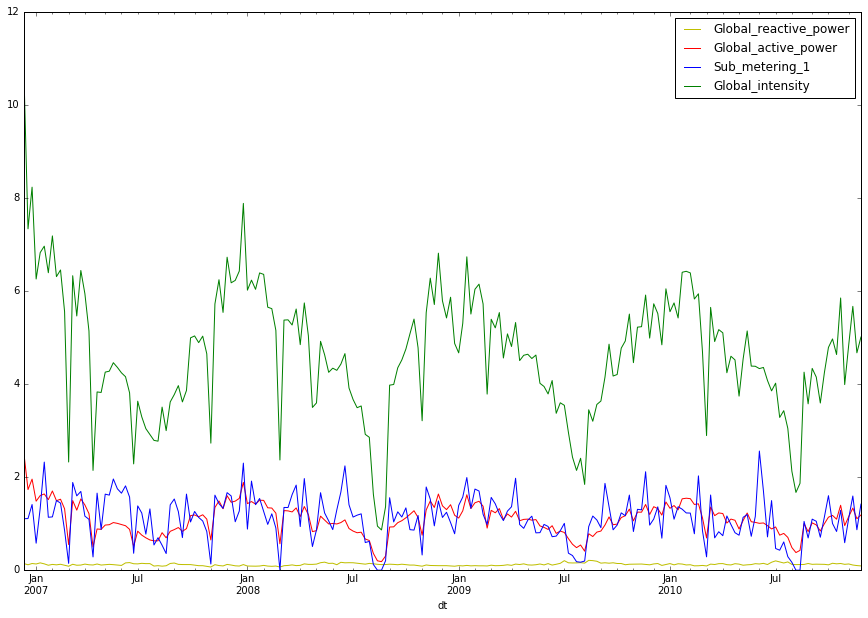

In [29]:
plt.figure(figsize=(15,10))
df['Global_reactive_power'].resample('W').mean().plot(color='y', legend = True)
df['Global_active_power'].resample('W').mean().plot(color = 'r', legend = True)
df['Sub_metering_1'].resample('W').mean().plot(color = 'b', legend = True)
df['Global_intensity'].resample('W').mean().plot(color = 'g', legend = True)


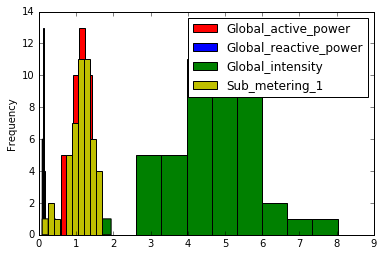

In [30]:
'''hist plot of the mean resampled over the months'''
df['Global_active_power'].resample('M').mean().plot(kind='hist', color='r', legend = True)
df['Global_reactive_power'].resample('M').mean().plot(kind='hist', color='b', legend = True)
df['Global_intensity'].resample('M').mean().plot(kind = 'hist', color = 'g', legend = True)
df['Sub_metering_1'].resample('M').mean().plot(kind='hist', color ='y', legend = True)

In [31]:
import seaborn as sns

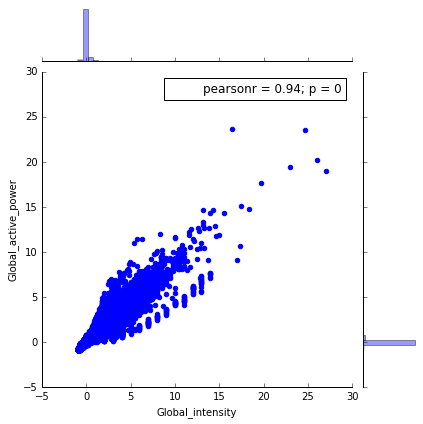

In [33]:
#finding the corelation between the variables
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y = 'Global_active_power', data = data_returns)
plt.show()

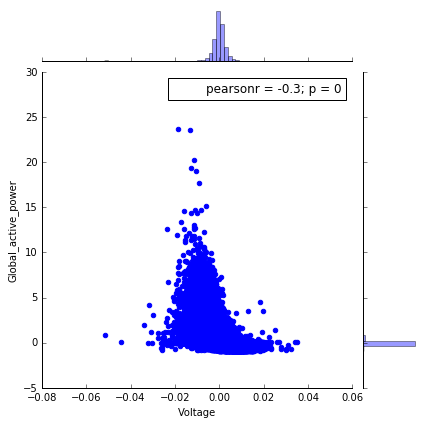

In [34]:
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

From the above graphs, we understand that Voltage and Global_active_power are less corelated but Global_intensity and Global_active_power are very corelated.

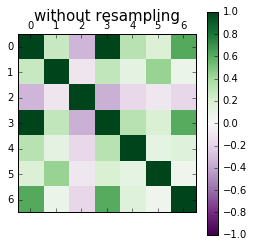

In [36]:
plt.matshow(df.corr(method='spearman'), vmax=1, vmin=-1, cmap='PRGn')
plt.title('without resampling', size = 15)
plt.colorbar()
plt.show()

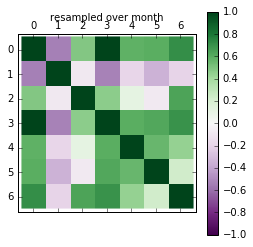

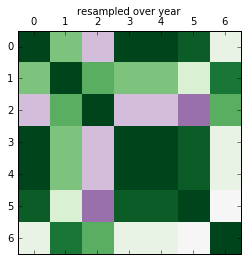

In [37]:
#correlation of mean resampled over month
plt.matshow(df.resample('M').mean().corr(method='spearman'), vmax=1, vmin=-1,cmap='PRGn')
plt.title('resampled over month', size = 10)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1, vmin=-1,cmap='PRGn')
plt.title('resampled over year', size = 10)
plt.show()

from the above resampling techniques one can change correlations among features. This is important for feature engineering.

Recurrent Neural Network (LSTM) which is best suited for time-series analysis. 
Here, we will frame the supervised learning problem as predicting Global_active_power at current time(t) given the Global_active_power measurement and other features at the prior time steps.

# Data Preparation and Feature Engineering 

In [55]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    diff = pd.DataFrame(data)
    cols, name = list(), list()
    for i in range(n_in, 0,-1):
        cols.append(diff.shift(i))
        name += [('var%d(t-%d)' % (j+1 , i)) for j in range(n_vars)]
    for i in range(0,n_out):
        cols.append(diff.shift(-i))
        if(i==0):
            name += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            name += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = name  
    #drop rows with NaN values
    if dropnan:
        agg.dropna(inplace = True)
    return agg

### To redice the computation time, we now resample the data over every hour rather than every minute as in the given dataset. The data of the structure will reduce.

In [40]:
resampled_df = df.resample('H').mean()
resampled_df.shape

(34589, 7)

Scaling the feature in the range [0,1]

In [43]:
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

C:\Users\naman\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
values = resampled_df.values

scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis =1, inplace = True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


From the above 7 input variables (input series) and the 1 output variable for Global_active_power at the current time in hour depending on resampling

### Splitting the rest of data to train and validation sets
First we split the preapred dataset into train and test sets

In [63]:
values = reframed.values
#fixing the size of the training set
n_train_time = 365*72
#dividing into train and test set
train = values[:n_train_time, :]
test = values[n_train_time:, :]

#dividing into the training and test set
train_X, train_y = train[:, :-1] , train[:,-1]
test_X, test_y = test[:, :-1] , test[:,-1]

In [64]:
#reshaping input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape,test_y.shape)

(26280, 1, 7) (26280,) (8308, 1, 7) (8308,)


# Model Architecture
### LSTM with 100 neurons in the first visible layer
### droupout 20%
### 1 output layer
### input shape will be 1 time step with 7 features
### Mean Absolute Error is used as loss function being the numeric data and ADAM as the Objective function
### The model runs for 25 epochs with a batch size of 70


In [66]:
#importing all the libraries for creating the model
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Train on 26280 samples, validate on 8308 samples
Epoch 1/20
 - 3s - loss: 0.0197 - val_loss: 0.0091
Epoch 2/20
 - 2s - loss: 0.0131 - val_loss: 0.0086
Epoch 3/20
 - 2s - loss: 0.0119 - val_loss: 0.0085
Epoch 4/20
 - 2s - loss: 0.0110 - val_loss: 0.0083
Epoch 5/20
 - 1s - loss: 0.0105 - val_loss: 0.0083
Epoch 6/20
 - 2s - loss: 0.0102 - val_loss: 0.0082
Epoch 7/20
 - 2s - loss: 0.0100 - val_loss: 0.0082
Epoch 8/20
 - 2s - loss: 0.0098 - val_loss: 0.0082
Epoch 9/20
 - 1s - loss: 0.0098 - val_loss: 0.0082
Epoch 10/20
 - 2s - loss: 0.0097 - val_loss: 0.0082
Epoch 11/20
 - 2s - loss: 0.0097 - val_loss: 0.0082
Epoch 12/20
 - 1s - loss: 0.0096 - val_loss: 0.0081
Epoch 13/20
 - 2s - loss: 0.0097 - val_loss: 0.0081
Epoch 14/20
 - 2s - loss: 0.0095 - val_loss: 0.0081
Epoch 15/20
 - 2s - loss: 0.0096 - val_loss: 0.0081
Epoch 16/20
 - 2s - loss: 0.0096 - val_loss: 0.0081
Epoch 17/20
 - 2s - loss: 0.0096 - val_loss: 0.0081
Epoch 18/20
 - 2s - loss: 0.0096 - val_loss: 0.0081
Epoch 19/20
 - 1s - loss

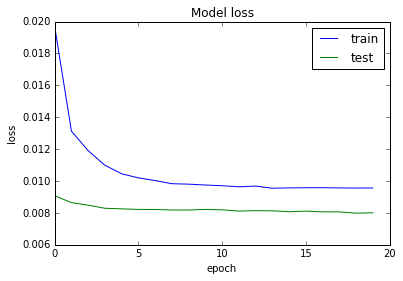

In [74]:
model = Sequential()
#adding the input layer
model.add(LSTM(10, input_shape = (train_X.shape[1], train_X.shape[2])))
#adding the dropout for the neural network --> optimization techniqur for faster gradient descent
model.add(Dropout(0.2))
#adding the output layer
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

#fitting the network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data= (test_X, test_y), verbose=2, shuffle=False)

#summarizing the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

(26280, 1, 7)
